In [15]:
# Import necessary libraries
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

# File paths
file1 = "E2_REAP_ERS_ALT_2S_19990318T080703_19990318T094838_RP01.NC"
file2 = "try_ers2_stormmarcello.nc"

# Function to print variable names in a NetCDF file
def print_variable_names(filepath):
    with netCDF4.Dataset(filepath, mode='r') as nc_file:
        print(f"Variables in file: {filepath}")
        for var_name in nc_file.variables:
            print(var_name)

# Print variable names for the first file
print_variable_names(file1)

# Print variable names for the second file (optional)
print_variable_names(file2)


Variables in file: E2_REAP_ERS_ALT_2S_19990318T080703_19990318T094838_RP01.NC
time
meas_ind
time_20hz
lat
lon
lat_20hz
lon_20hz
surface_type
rad_surf_type
qual_alt_1hz_range_ocean
qual_alt_1hz_swh_ocean
qual_alt_1hz_sig0_ocean
rad_state_flag_l2_proc_error
rad_state_flag_orb
rad_state_flag_orb_prop
rad_state_flag_orb_init
rad_state_validity
rad_state_flag
rad_state_flag_land_ocean
rad_state_bt_check
alt_state_flag
alt_state_flag_20hz
alt_state_flag_tracking_surface_20hz
alt_state_flag_tracking_type_20hz
alt_state_flag_lost_track_assert_20hz
alt_state_flag_lost_track_alarm_20hz
alt_state_flag_chirp_type_20hz
ice_flag
ice_class_1
ice_class_2
ice_class_3
ice_class_4
interp_flag_tb
alt
alt_20hz
orb_alt_rate
orb_alt_rate_20hz
ocean_range
ocean_range_20hz
ocean_range_used_20hz
ocean_range_rms
ocean_range_numval
ocean_qual_flag_20hz
off_nadir_angle_wf
off_nadir_angle_wf_20hz
tracker_range_20hz
swh_20hz
swh_used_20hz
ice1_range_20hz
thermal_noise_20hz
ice2_range_20hz
ice2_le_width_20hz
ice2_1st

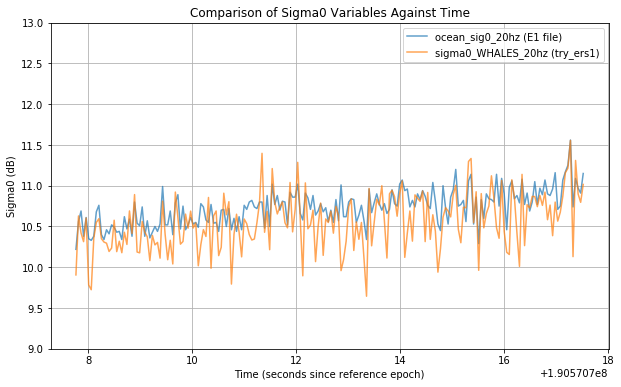

In [16]:
# Import necessary libraries
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

# File paths
file1 = "E1_REAP_ERS_ALT_2S_19960115T154521_19960115T172425_RP01.NC"
file2 = "try_ers1.nc"

# Read data from the first file
with netCDF4.Dataset(file1, mode='r') as nc1:
    time1 = nc1.variables['time_20hz'][:]
    sig0_1 = nc1.variables['ocean_sig0_20hz'][:]

# Read data from the second file
with netCDF4.Dataset(file2, mode='r') as nc2:
    time2 = nc2.variables['time_20hz'][:]
    sig0_2 = nc2.variables['sigma0_WHALES_20hz'][:]

# Reshape the sigma0 variables from (5981, 20) to (5981*20,)
sig0_1_flat = sig0_1.reshape(-1)
sig0_2_flat = sig0_2.reshape(-1)

# Reshape the time variables to match the flattened sigma0 arrays
time1_flat = time1.reshape(-1)
time2_flat = time2.reshape(-1)

# Slice the data to restrict the x-axis to indices from 7000 to 7200
index_range = slice(40000, 40200)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time1_flat[index_range], sig0_1_flat[index_range], label="ocean_sig0_20hz (E1 file)", alpha=0.7)
plt.plot(time2_flat[index_range], sig0_2_flat[index_range], label="sigma0_WHALES_20hz (try_ers1)", alpha=0.7)

# Set axis limits
plt.ylim(9, 13)  # Restrict y-axis to 10 to 20

# Add labels and legend
plt.xlabel("Time (seconds since reference epoch)")
plt.ylabel("Sigma0 (dB)")
plt.title("Comparison of Sigma0 Variables Against Time")
plt.legend()
plt.grid()
plt.show()


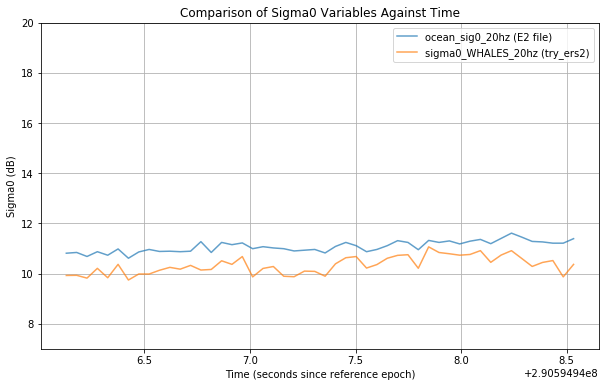

In [17]:
# Import necessary libraries
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

# File paths
file1 = "E2_REAP_ERS_ALT_2S_19990318T080703_19990318T094838_RP01.NC"
file2 = "try_ers2_stormmarcello.nc"

# Read data from the first file
with netCDF4.Dataset(file1, mode='r') as nc1:
    time1 = nc1.variables['time_20hz'][:]
    sig0_1 = nc1.variables['ocean_sig0_20hz'][:]

# Read data from the second file
with netCDF4.Dataset(file2, mode='r') as nc2:
    time2 = nc2.variables['time_20hz'][:]
    sig0_2 = nc2.variables['sigma0_WHALES_20hz'][:]

# Reshape the sigma0 variables from (5981, 20) to (5981*20,)
sig0_1_flat = sig0_1.reshape(-1)
sig0_2_flat = sig0_2.reshape(-1)

# Reshape the time variables to match the flattened sigma0 arrays
time1_flat = time1.reshape(-1)
time2_flat = time2.reshape(-1)

# Slice the data to restrict the x-axis to indices from 7000 to 7200
index_range = slice(50550, 50600)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time1_flat[index_range], sig0_1_flat[index_range], label="ocean_sig0_20hz (E2 file)", alpha=0.7)
plt.plot(time2_flat[index_range], sig0_2_flat[index_range], label="sigma0_WHALES_20hz (try_ers2)", alpha=0.7)

# Set axis limits
plt.ylim(7, 20)  # Restrict y-axis to 10 to 20

# Add labels and legend
plt.xlabel("Time (seconds since reference epoch)")
plt.ylabel("Sigma0 (dB)")
plt.title("Comparison of Sigma0 Variables Against Time")
plt.legend()
plt.grid()
plt.show()


In [18]:
# Import necessary libraries
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# File paths
file1 = "E2_REAP_ERS_ALT_2S_19990318T080703_19990318T094838_RP01.NC"
file2 = "try_ers2_stormmarcello.nc"

# Read data from the first file
with netCDF4.Dataset(file1, mode='r') as nc1:
    time = np.asarray(nc1.variables['time'][:])  # Read time data and convert to a standard array
    time1 = np.asarray(nc1.variables['time_20hz'][:])
    sig0_1 = np.asarray(nc1.variables['swh_20hz'][:])
    lat_20hz = np.asarray(nc1.variables['lat_20hz'][:])  # Read latitude data
    lon_20hz = np.asarray(nc1.variables['lon_20hz'][:])  # Read latitude data
    surface_type = np.asarray(nc1.variables['surface_type'][:])  # Read surface_type data

# Read data from the second file
with netCDF4.Dataset(file2, mode='r') as nc2:
    time2 = np.asarray(nc2.variables['time_20hz'][:])
    sig0_2 = np.asarray(nc2.variables['swh_WHALES_20hz'][:])

# Reshape the sigma0 variables from (5981, 20) to (5981*20,)
sig0_1_flat = sig0_1.reshape(-1)
sig0_2_flat = sig0_2.reshape(-1)

# Reshape the time variables to match the flattened sigma0 arrays
time1_flat = time1.reshape(-1)
time2_flat = time2.reshape(-1)

# Reshape lat_20hz and surface_type to match the flattened arrays
lat_20hz_flat = lat_20hz.reshape(-1)
lon_20hz_flat = lon_20hz.reshape(-1)
surface_type_flat = surface_type.reshape(-1)

# Handle potential masked arrays by filling with NaN
time = np.ma.filled(time, np.nan)
surface_type_flat = np.ma.filled(surface_type_flat, np.nan)

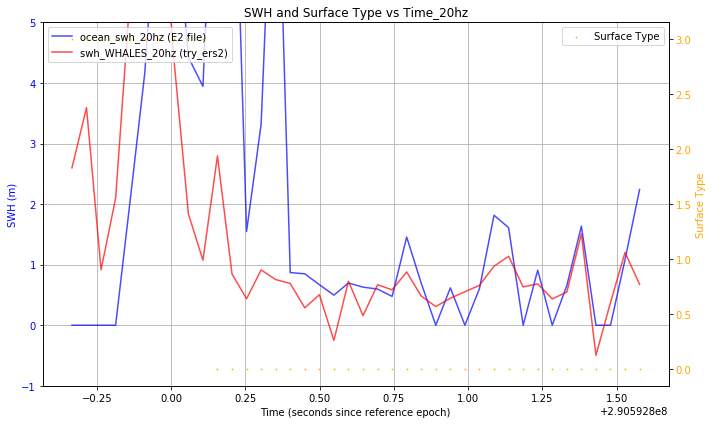

In [19]:

## FOCUS ON A COASTAL TRANSITION


# Interpolate surface_type to match time_20hz using nearest neighbor interpolation
interp_surface_type = interp1d(time, surface_type_flat, kind='nearest', bounds_error=False, fill_value='extrapolate')
surface_type_interpolated = interp_surface_type(time1_flat).astype(int)

# Slice the data to restrict the x-axis to indices from 7000 to 7200
index_range = slice(7450, 7490)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# First y-axis: SWH variables against time
ax1.plot(time1_flat[index_range], sig0_1_flat[index_range], label="ocean_swh_20hz (E2 file)", alpha=0.7, color="blue")
ax1.plot(time2_flat[index_range], sig0_2_flat[index_range], label="swh_WHALES_20hz (try_ers2)", alpha=0.7, color="red")
ax1.set_ylim(-1, 5)
ax1.set_xlabel("Time (seconds since reference epoch)")
ax1.set_ylabel("SWH (m)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.legend(loc="upper left")
ax1.grid()

# Second y-axis: Surface type vs time_20hz
ax2 = ax1.twinx()
ax2.scatter(time1_flat[index_range], surface_type_interpolated[index_range], s=1, alpha=0.7, color='orange', label="Surface Type")
ax2.set_ylabel("Surface Type", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")
ax2.legend(loc="upper right")

# Title and layout
plt.title("SWH and Surface Type vs Time_20hz")
plt.tight_layout()
plt.show()



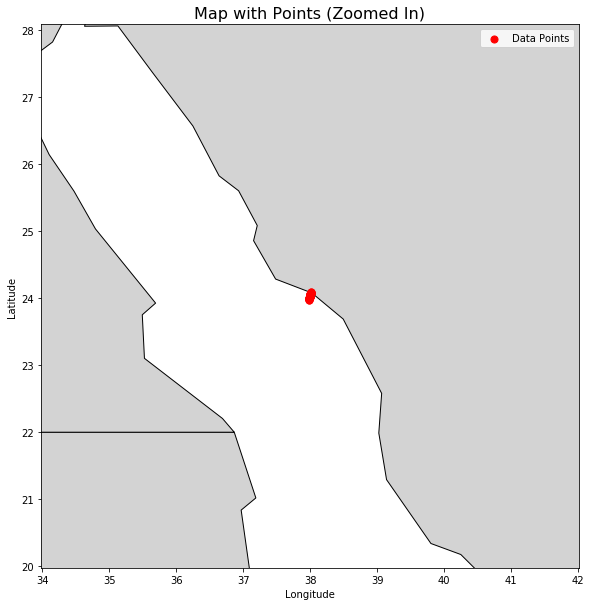

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np


# Select latitude and longitude based on the index range
latitudes = lat_20hz_flat[index_range]
longitudes = lon_20hz_flat[index_range]

# Create a GeoDataFrame from the latitude and longitude points
geometry = [Point(lon, lat) for lon, lat in zip(longitudes, latitudes)]
gdf_points = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")  # Use WGS84 coordinate system

# Load a world map from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Calculate map boundaries (+-2 degrees around the selected points)
min_lat, max_lat = latitudes.min() - 4, latitudes.max() + 4
min_lon, max_lon = longitudes.min() - 4, longitudes.max() + 4

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='black')  # Plot the base world map
gdf_points.plot(ax=ax, color='red', markersize=50, label='Data Points')  # Plot the points

# Set the plot limits to zoom in on the area of interest
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

# Add title, legend, and labels
plt.title("Map with Points (Zoomed In)", fontsize=16)
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()


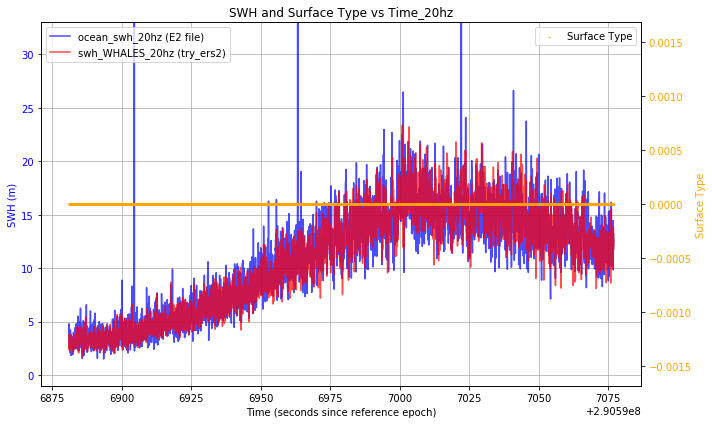

In [21]:

## FOCUS ON A STORM


# Interpolate surface_type to match time_20hz using nearest neighbor interpolation
interp_surface_type = interp1d(time, surface_type_flat, kind='nearest', bounds_error=False, fill_value='extrapolate')
surface_type_interpolated = interp_surface_type(time1_flat).astype(int)

# Slice the data to restrict the x-axis to indices from 7000 to 7200
index_range = slice(90000, 94000)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# First y-axis: SWH variables against time
ax1.plot(time1_flat[index_range], sig0_1_flat[index_range], label="ocean_swh_20hz (E2 file)", alpha=0.7, color="blue")
ax1.plot(time2_flat[index_range], sig0_2_flat[index_range], label="swh_WHALES_20hz (try_ers2)", alpha=0.7, color="red")
ax1.set_ylim(-1, 33)
ax1.set_xlabel("Time (seconds since reference epoch)")
ax1.set_ylabel("SWH (m)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.legend(loc="upper left")
ax1.grid()

# Second y-axis: Surface type vs time_20hz
ax2 = ax1.twinx()
ax2.scatter(time1_flat[index_range], surface_type_interpolated[index_range], s=1, alpha=0.7, color='orange', label="Surface Type")
ax2.set_ylabel("Surface Type", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")
ax2.legend(loc="upper right")

# Title and layout
plt.title("SWH and Surface Type vs Time_20hz")
plt.tight_layout()
plt.show()



In [22]:
# Import necessary libraries
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# File paths
file1 = "E1_REAP_ERS_ALT_2S_19960115T154521_19960115T172425_RP01.NC"
file2 = "try_ers1.nc"

# Read data from the first file
with netCDF4.Dataset(file1, mode='r') as nc1:
    time = np.asarray(nc1.variables['time'][:])  # Read time data and convert to a standard array
    time1 = np.asarray(nc1.variables['time_20hz'][:])
    sig0_1 = np.asarray(nc1.variables['swh_20hz'][:])
    lat_20hz = np.asarray(nc1.variables['lat_20hz'][:])  # Read latitude data
    surface_type = np.asarray(nc1.variables['surface_type'][:])  # Read surface_type data    
    lon_20hz = np.asarray(nc1.variables['lon_20hz'][:])  # Read longitude data   

# Read data from the second file
with netCDF4.Dataset(file2, mode='r') as nc2:
    time2 = np.asarray(nc2.variables['time_20hz'][:])
    sig0_2 = np.asarray(nc2.variables['swh_WHALES_20hz'][:])

# Reshape the sigma0 variables from (5981, 20) to (5981*20,)
sig0_1_flat = sig0_1.reshape(-1)
sig0_2_flat = sig0_2.reshape(-1)

# Reshape the time variables to match the flattened sigma0 arrays
time1_flat = time1.reshape(-1)
time2_flat = time2.reshape(-1)

# Reshape lat_20hz and surface_type to match the flattened arrays
lat_20hz_flat = lat_20hz.reshape(-1)
surface_type_flat = surface_type.reshape(-1)
lon_20hz_flat = lon_20hz.reshape(-1)

# Handle potential masked arrays by filling with NaN
time = np.ma.filled(time, np.nan)
surface_type_flat = np.ma.filled(surface_type_flat, np.nan)

# Interpolate surface_type to match time_20hz using nearest neighbor interpolation
interp_surface_type = interp1d(time, surface_type_flat, kind='nearest', bounds_error=False, fill_value='extrapolate')
surface_type_interpolated = interp_surface_type(time1_flat).astype(int)

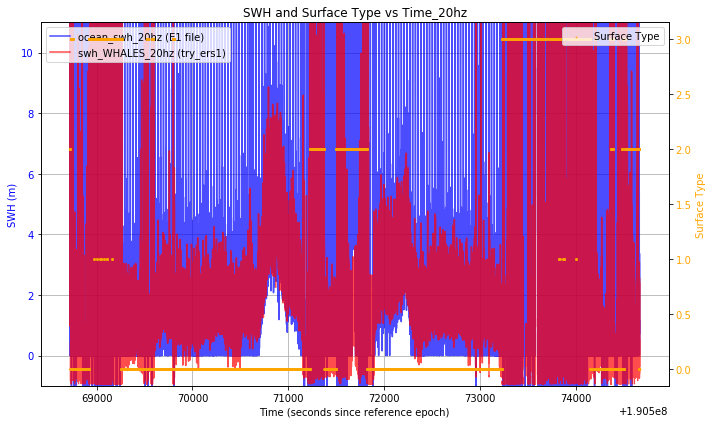

In [23]:
# General view
index_range = slice(0, 150000)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# First y-axis: SWH variables against time
ax1.plot(time1_flat[index_range], sig0_1_flat[index_range], label="ocean_swh_20hz (E1 file)", alpha=0.7, color="blue")
ax1.plot(time2_flat[index_range], sig0_2_flat[index_range], label="swh_WHALES_20hz (try_ers1)", alpha=0.7, color="red")
ax1.set_ylim(-1, 11)
ax1.set_xlabel("Time (seconds since reference epoch)")
ax1.set_ylabel("SWH (m)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.legend(loc="upper left")
ax1.grid()

# Second y-axis: Surface type vs time_20hz
ax2 = ax1.twinx()
ax2.scatter(time1_flat[index_range], surface_type_interpolated[index_range], s=1, alpha=0.7, color='orange', label="Surface Type")
ax2.set_ylabel("Surface Type", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")
ax2.legend(loc="upper right")

# Title and layout
plt.title("SWH and Surface Type vs Time_20hz")
plt.tight_layout()
plt.show()

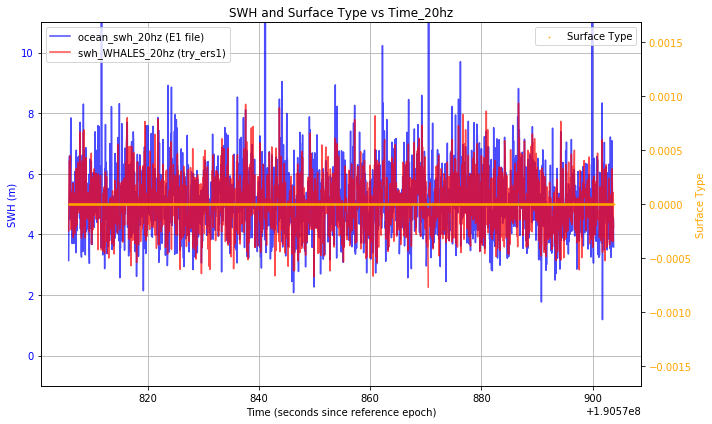

In [24]:
# An example in a stormy sea

index_range = slice(42000, 44000)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# First y-axis: SWH variables against time
ax1.plot(time1_flat[index_range], sig0_1_flat[index_range], label="ocean_swh_20hz (E1 file)", alpha=0.7, color="blue")
ax1.plot(time2_flat[index_range], sig0_2_flat[index_range], label="swh_WHALES_20hz (try_ers1)", alpha=0.7, color="red")
ax1.set_ylim(-1, 11)
ax1.set_xlabel("Time (seconds since reference epoch)")
ax1.set_ylabel("SWH (m)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.legend(loc="upper left")
ax1.grid()

# Second y-axis: Surface type vs time_20hz
ax2 = ax1.twinx()
ax2.scatter(time1_flat[index_range], surface_type_interpolated[index_range], s=1, alpha=0.7, color='orange', label="Surface Type")
ax2.set_ylabel("Surface Type", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")
ax2.legend(loc="upper right")

# Title and layout
plt.title("SWH and Surface Type vs Time_20hz")
plt.tight_layout()
plt.show()

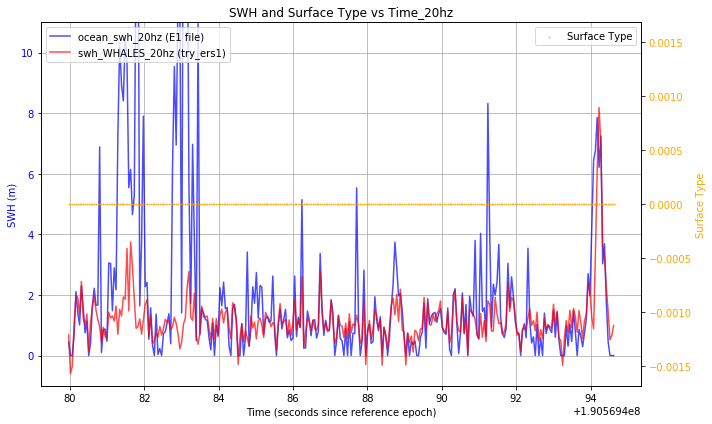

In [25]:
# An example in the coastal zone
index_range = slice(15000, 15300)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# First y-axis: SWH variables against time
ax1.plot(time1_flat[index_range], sig0_1_flat[index_range], label="ocean_swh_20hz (E1 file)", alpha=0.7, color="blue")
ax1.plot(time2_flat[index_range], sig0_2_flat[index_range], label="swh_WHALES_20hz (try_ers1)", alpha=0.7, color="red")
ax1.set_ylim(-1, 11)
ax1.set_xlabel("Time (seconds since reference epoch)")
ax1.set_ylabel("SWH (m)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.legend(loc="upper left")
ax1.grid()

# Second y-axis: Surface type vs time_20hz
ax2 = ax1.twinx()
ax2.scatter(time1_flat[index_range], surface_type_interpolated[index_range], s=1, alpha=0.7, color='orange', label="Surface Type")
ax2.set_ylabel("Surface Type", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")
ax2.legend(loc="upper right")

# Title and layout
plt.title("SWH and Surface Type vs Time_20hz")
plt.tight_layout()
plt.show()



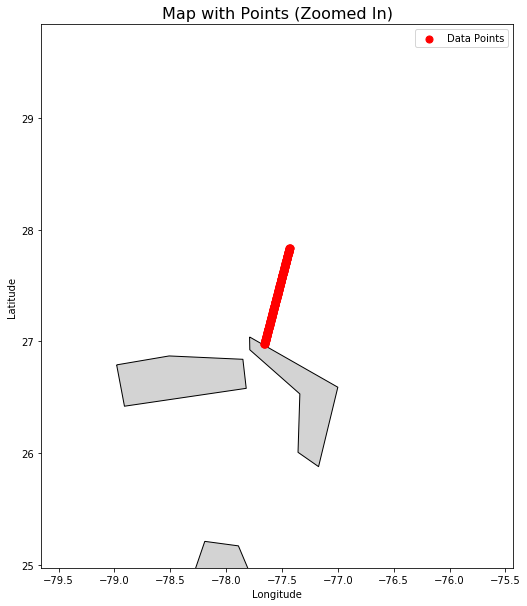

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np


# Select latitude and longitude based on the index range
latitudes = lat_20hz_flat[index_range]
longitudes = lon_20hz_flat[index_range]


# Create a GeoDataFrame from the latitude and longitude points
geometry = [Point(lon, lat) for lon, lat in zip(longitudes, latitudes)]
gdf_points = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")  # Use WGS84 coordinate system

# Load a world map from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Calculate map boundaries (+-2 degrees around the selected points)
min_lat, max_lat = latitudes.min() - 2, latitudes.max() + 2
min_lon, max_lon = longitudes.min() - 2, longitudes.max() + 2

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='black')  # Plot the base world map
gdf_points.plot(ax=ax, color='red', markersize=50, label='Data Points')  # Plot the points

# Set the plot limits to zoom in on the area of interest
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

# Add title, legend, and labels
plt.title("Map with Points (Zoomed In)", fontsize=16)
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()



In [27]:
with netCDF4.Dataset(file2, mode='r') as nc2:
    print(nc2.variables.keys())

odict_keys(['time_20hz', 'lat_20hz', 'lon_20hz', 'swh_WHALES_20hz', 'swh_WHALES_instr_corr_20hz', 'sigma0_WHALES_20hz', 'range_WHALES_20hz', 'epoch_WHALES_20hz', 'swh_WHALES_qual_20hz'])


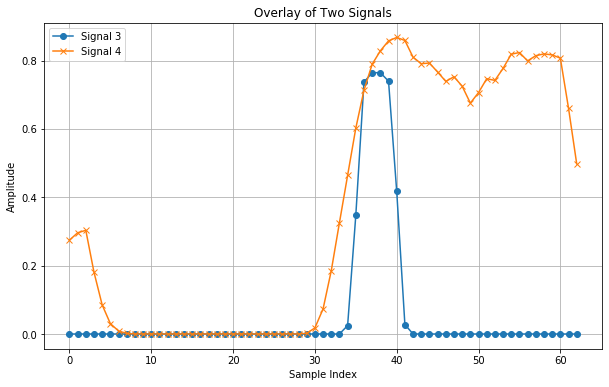

In [28]:
# EXAMPLE OF A WEIRD "CALIBRATION-LIKE" OCEANIC WAVEFORM IN ERS-2, HAPPENING AT REGULAR INTERVALS

import numpy as np
import matplotlib.pyplot as plt

# Define the signals
signal3 = np.array([
    0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
    0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
    0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
    0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
    0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
    0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
    0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
    0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
    0.00000000e+00, 5.02262147e-31, 2.45957444e-02, 3.47033386e-01,
    7.36929793e-01, 7.64353151e-01, 7.64398033e-01, 7.39802289e-01,
    4.17364648e-01, 2.74682401e-02, 4.48827452e-05, 0.00000000e+00,
    0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
    0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
    0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
    0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
    0.00000000e+00, 0.00000000e+00, 0.00000000e+00
])

signal4 = np.array([
    2.74479863e-01, 2.96048864e-01, 3.03302157e-01, 1.80759687e-01,
    8.51307501e-02, 3.03493033e-02, 8.78030158e-03, 1.52700897e-03,
    0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
    0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
    0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
    0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
    0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
    6.57301462e-32, 1.90876121e-03, 1.77514793e-02, 7.32964306e-02,
    1.84958962e-01, 3.25634663e-01, 4.64210727e-01, 6.02214163e-01,
    7.13113190e-01, 7.89272762e-01, 8.28402367e-01, 8.57606413e-01,
    8.67531972e-01, 8.58751670e-01, 8.09696507e-01, 7.90799771e-01,
    7.92708532e-01, 7.66367627e-01, 7.39072342e-01, 7.52624547e-01,
    7.24947509e-01, 6.75510594e-01, 7.06241649e-01, 7.46898263e-01,
    7.41935484e-01, 7.77056690e-01, 8.18667685e-01, 8.23439588e-01,
    7.99007444e-01, 8.14277534e-01, 8.19431189e-01, 8.16568047e-01,
    8.07024241e-01, 6.60431380e-01, 4.97804925e-01
])

# Plot the signals
plt.figure(figsize=(10, 6))
plt.plot(signal3, label='Signal 3', marker='o')
plt.plot(signal4, label='Signal 4', marker='x')
plt.title('Overlay of Two Signals')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
